In [1]:
#plotly libraries
import plotly.express as px
import plotly.colors as pc
import plotly.graph_objects as go
import plotly.io as pio


#default renderer (svg means very small file size, visibility on github, high quality, but requires sometimes setting height and width)
pio.renderers.default = "svg"

colors = ["#363b3d", "#727b76", "#31a240", "#f93939", "#f79118", "#de7b06", "#9b308f", "#dc759b"]
#additional defaults
px.defaults.color_discrete_sequence = ["rgb(100,100,100)"] + pc.qualitative.D3
px.defaults.width=800
px.defaults.height=600

#set default template as "simple_white" (no background, no grid lines)
pio.templates["simple_white"].layout["yaxis"]["showgrid"] = True
pio.templates.default = "simple_white"

import numpy as np

import sklearn.metrics as metrics
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

colorscale = pc.sequential.Plasma
colorscale = [colorscale[0]] + colorscale[3:8]

# Plot isoforms per sample

In [2]:
import os
figure_dir = "figures/isoform_expression"
os.makedirs(figure_dir, exist_ok=True)

In [3]:

isoforms = [
    'RT1_unspliced1', 
    'RT2_unspliced2', 
    'RT2_Vif2_RT3_Vif1',
    'RT2_Vif3_RT3_Vif6', 
    'RT2_Vif4_RT3_Vif9', 
    'RT2_Vif5_RT3_Vif8',
    'RT2_Vif7', 
    
    'RT2_Vpr3_RT3_Vpr1', 
    'RT2_Vpr4_RT3_Vpr2',
       
    'RT2_Env1_RT3_Nef2', 
    'RT2_Env9_RT3_Nef4', 
    'RT2_Env2_RT3_Rev1',
    'RT2_Env3_RT3_Rev2', 
    'RT2_Env17_RT3_Nef9', 
    'RT2_Env5_RT3_Nef3',
    'RT2_Env13_RT3_Nef5', 
    'RT2_Env18_RT3_Rev13', 
    'RT2_Env10_RT3_Rev7',
    'RT2_Env19_RT3_Nef12', 
    'RT2_Env11_RT3_Rev8', 
    'RT2_Env14_RT3_Rev10',
    'RT2_Env15_RT3_Rev11', 
    'RT2_Env12_RT3_Rev9', 
    'RT2_Env6_RT3_Rev4',
    'RT2_Env7_RT3_Rev5', 
    'RT2_Env4_RT3_Rev3', 
    'RT2_Env8_RT3_Rev6',
    'RT2_Env20_RT3_Nef11', 
    
    'RT2_Tat5_RT3_Tat1', 
    'RT2_Tat6_RT3_Tat2',
    'RT2_Tat7_RT3_Tat3', 
    'RT2_Tat8_RT3_Tat4', 
    'RT2_Tat12_RT3_Tat9',
    'RT3_Tat10', 
    'RT3_Tat11', 
    'RT3_Tat13', 
    'RT3_Tat15', 
    'RT3_Tat16',
    
    'RT3_Rev12', 
    
    'RT3_Nef16', 
    'RT3_Nef15', 
    'RT3_Nef19', 
    'RT3_Nef20',
    'RT3_Nef22', 
    'RT3_Nef23', 
    
    'RT3_sORF1', 
    'RT3_sORF3']


isoform_colors_RT2 = {
    " "  : "white",
    "unspliced" : "grey",
 'RT1_unspliced1': "black",
 'RT2_unspliced2': "black",

 'RT2_Env1_RT3_Nef2': "rgb(26,82,118)",
 'RT2_Env2_RT3_Rev1': "rgb(31,97,141)",
 'RT2_Env3_RT3_Rev2': "rgb(36,113,163)",
 'RT2_Env4_RT3_Rev3': "rgb(41,128,185)", 
 'RT2_Env5_RT3_Nef3': "rgb(84,153,199)",
 'RT2_Env6_RT3_Rev4': "rgb(127,179,213)",
 'RT2_Env7_RT3_Rev5': "rgb(169,204,227)", 
 'RT2_Env8_RT3_Rev6': "rgb(27,79,114)",
 'RT2_Env9_RT3_Nef4': "rgb(33,97,140)",
 'RT2_Env10_RT3_Rev7': "rgb(40,116,166)",
 'RT2_Env11_RT3_Rev8': "rgb(46,134,163)",
 'RT2_Env12_RT3_Rev9': "rgb(52,152,219)", 
 'RT2_Env13_RT3_Nef5': "rgb(93,173,226)",
 'RT2_Env14_RT3_Rev10': "rgb(133,193,233)",
 'RT2_Env15_RT3_Rev11': "rgb(174,214,241)",
 'RT2_Env17_RT3_Nef9': "rgb(84,153,199)",
 'RT2_Env18_RT3_Rev13': "rgb(127,179,213)",
 'RT2_Env19_RT3_Nef12': "rgb(169,204,224)",
 'RT2_Env20_RT3_Nef11': "rgb(174,214,241)", 
    
 'RT3_Nef16': "grey",
    'RT3_Nef15': "grey", 
    'RT3_Nef19': "grey", 
    'RT3_Nef20': "grey",
    'RT3_Nef22': "grey", 
    'RT3_Nef23': "grey", 

    'RT3_Rev12':"grey", 

 'RT2_Tat5_RT3_Tat1': "rgb(207,87,161)",
 'RT2_Tat6_RT3_Tat2': "rgb(217,144,188)",
 'RT2_Tat7_RT3_Tat3': "rgb(237,206,228)",
 'RT2_Tat8_RT3_Tat4': "rgb(221,168,200)",
 'RT2_Tat12_RT3_Tat9': "rgb(229,186,216)",

    'RT3_Tat10': "grey", 
    'RT3_Tat11': "grey", 
    'RT3_Tat13': "grey", 
    'RT3_Tat15': "grey", 
    'RT3_Tat16': "grey",
    
 'RT2_Vif2_RT3_Vif1': "rgb(96,22,135)",
 'RT2_Vif3_RT3_Vif6': "rgb(141,74,176)",
 'RT2_Vif4_RT3_Vif9': "rgb(170,89,212)",
 'RT2_Vif5_RT3_Vif8': "rgb(204,108,255)",
    'RT2_Vif7':"rgb(142,68,173)",
    
 'RT2_Vpr3_RT3_Vpr1': "rgb(168,30,45)",
 'RT2_Vpr4_RT3_Vpr2': "rgb(192,98,106)",

 'RT3_sORF1': "rgb(177,153,109)",
 'RT3_sORF3': "rgb(157,138,109)",
}


isoform_colors_RT3 = {
 'RT1_unspliced1': "black",
 'RT2_unspliced2': "black",

    "Nef" : "green",
 'RT2_Env1_RT3_Nef2': "rgb(17,120,100)",
 'RT2_Env5_RT3_Nef3': "rgb(20,143,119)",
 'RT2_Env9_RT3_Nef4': "rgb(23,165,137)",
 'RT2_Env13_RT3_Nef5': "rgb(26,188,156)",
 'RT2_Env17_RT3_Nef9': "rgb(72,201,176)",
 'RT2_Env20_RT3_Nef11': "rgb(118,215,196)", 
 'RT2_Env19_RT3_Nef12': "rgb(163,228,215)",
 'RT3_Nef15': "rgb(29,131,72)", 
 'RT3_Nef16': "rgb(35,155,86)",
 'RT3_Nef19': "rgb(40,180,99)", 
 'RT3_Nef20': "rgb(46,204,113)",
 'RT3_Nef22': "rgb(88,214,141)", 
 'RT3_Nef23': "rgb(130,224,170)", 

 'RT2_Env2_RT3_Rev1': "rgb(147,81,22)",
 'RT2_Env3_RT3_Rev2': "rgb(175,96,26)",
 'RT2_Env4_RT3_Rev3': "rgb(202,111,30)",
 'RT2_Env6_RT3_Rev4': "rgb(230,126,34)",
 'RT2_Env7_RT3_Rev5': "rgb(235,152,78)",
 'RT2_Env8_RT3_Rev6': "rgb(240,178,122)",
 'RT2_Env10_RT3_Rev7': "rgb(185,119,14)",
 'RT2_Env11_RT3_Rev8': "rgb(214,137,16)",
 'RT2_Env12_RT3_Rev9': "rgb(243,156,18)",
 'RT2_Env14_RT3_Rev10': "rgb(245,176,65)",
 'RT2_Env15_RT3_Rev11': "rgb(248,180,113)",
 'RT3_Rev12': "rgb(246,221,204)", 
 'RT2_Env18_RT3_Rev13': "rgb(250,215,160)",
 
    
 'RT2_Tat5_RT3_Tat1': "rgb(207,87,161)",
 'RT2_Tat6_RT3_Tat2': "rgb(217,144,188)",
 'RT2_Tat7_RT3_Tat3': "rgb(237,206,228)",
 'RT2_Tat8_RT3_Tat4': "rgb(221,168,200)",
 'RT2_Tat12_RT3_Tat9': "rgb(229,186,216)",

 'RT3_Tat10': "rgb(240,98,146)", 
 'RT3_Tat11': "rgb(244,143,177)", 
 'RT3_Tat13': "rgb(248,187,208)", 
 'RT3_Tat15': "rgb(252,200,215)", 
 'RT3_Tat16': "rgb(252,228,236)",
    
 'RT2_Vif2_RT3_Vif1': "rgb(96,22,135)",
 'RT2_Vif3_RT3_Vif6': "rgb(141,74,176)",
 'RT2_Vif4_RT3_Vif9': "rgb(170,89,212)",
 'RT2_Vif5_RT3_Vif8': "rgb(204,108,255)",
 'RT2_Vif7' : "grey",
 'RT2_Vpr3_RT3_Vpr1': "rgb(168,30,45)",
 'RT2_Vpr4_RT3_Vpr2': "rgb(192,98,106)",

 'RT3_sORF1': "rgb(177,153,109)",
 'RT3_sORF3': "rgb(157,138,109)",
}

In [4]:
order_dict = {
    "DMS_conc" : [f"{i}mM" for i in [0,8,17,34,57,85]],
    "isoform" : isoforms
}

In [5]:
data_folder = f"{os.getcwd()}/data"

# Get sample names

In [6]:
import pandas as pd
samplesheet = pd.read_excel("Samplesheet_example.xlsx", engine="openpyxl")
samples = samplesheet["sample"].values
samples

array(['Nanopore_HIV1_Rep1_RT-US_0mM_cell',
       'Nanopore_HIV1_Rep1_RT-US_57mM_cell',
       'Nanopore_HIV1_Rep1_RT-US_85mM_cell',
       'Nanopore_HIV1_Rep2_RT-US_0mM_cell',
       'Nanopore_HIV1_Rep2_RT-US_57mM_cell',
       'Nanopore_HIV1_Rep2_RT-US_85mM_cell',
       'Nanopore_HIV1_Rep1_RT-FS_0mM_cell',
       'Nanopore_HIV1_Rep1_RT-FS_57mM_cell',
       'Nanopore_HIV1_Rep1_RT-FS_85mM_cell',
       'Nanopore_HIV1_Rep2_RT-FS_0mM_cell',
       'Nanopore_HIV1_Rep2_RT-FS_57mM_cell',
       'Nanopore_HIV1_Rep2_RT-FS_85mM_cell'], dtype=object)

In [8]:
# adjust this function to your naming scheme. Splitting the name into its separate parts allows for straightforward plotting of comparisons

def split_unique_name(df, unique_name_column = "unique_name"):
    df["replicate"] = df[unique_name_column].apply(lambda x: x.split("_")[2])
    df["RT"] = df[unique_name_column].apply(lambda x: x.split("_")[3])
    df["DMS_conc"] = df[unique_name_column].apply(lambda x: x.split("_")[4])
    df["rep_and_DMS"] = df["replicate"] + "_" + df["DMS_conc"]
    df["RT_and_DMS"] = df["RT"] + "_" + df["DMS_conc"]
    df["DMS_conc"] = df["DMS_conc"].astype("category")
    
    return df

# Read in isoquant output

In [9]:
# reading in from isoquant output
tmp_data = []
for sample in samples:
    tmp_df = pd.read_csv(f"{data_folder}/isoquant/{sample}/{sample}.read_assignments.tsv", sep="\t", skiprows=2)
    tmp_df["sample"] = sample
    tmp_data.append(tmp_df)
read_assignment_df = pd.concat(tmp_data)

In [10]:
read_assignment_df = read_assignment_df.rename(columns={"#read_id" :"read_id"})

In [11]:
# To decrease time it takes to load data you can store the dataframe on disk

#this is the dataframe that is used in notebook 1
read_assignment_df.to_pickle(f"{data_folder}/isoquant/read_assignments.pickle.gz")

In [13]:
# if already stored on disk
read_assignment_df = pd.read_pickle(f"{data_folder}/isoquant/read_assignments.pickle.gz")

# Take per read information to calculate assignment types

In [89]:
order = {"assignment_type" : ["unique", "unique_minor_difference", "ambiguous", "inconsistent", "noninformative"],
         "DMS_conc" : [f"{i}mM" for i in [0,8,17,34,57,85]]}


## Plot individual read assignments

In [104]:
# it is important here to drop duplicates of read_id + assignment_type, because ambigously assigned reads appear multiple times

assignment_counts = read_assignment_df[["read_id", "assignment_type", "sample"]].drop_duplicates().groupby("sample")["assignment_type"].value_counts().reset_index(name="count")
assignment_counts = split_unique_name(assignment_counts, unique_name_column = "sample")
total_count_dict = assignment_counts.groupby("sample")["count"].sum().to_dict()

assignment_counts["percent"] = assignment_counts.apply(lambda x: 100*x["count"]/(total_count_dict[x["sample"]]), axis=1)

In [105]:
os.makedirs("figures/isoform_expression", exist_ok=True)

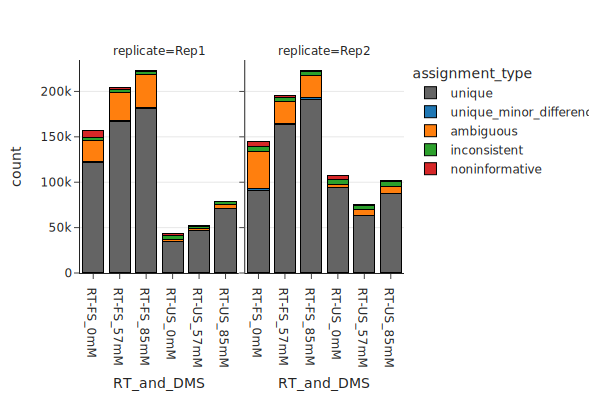

In [106]:
fig = px.bar(assignment_counts, x="RT_and_DMS", y="count", facet_col="replicate", color="assignment_type", barmode="stack", category_orders=order)
fig.update_yaxes(dtick=50000, showgrid=True)
fig.update_traces(width=0.8, marker_line_width=1, marker_line_color="black")
fig.update_layout(width=600, height=400)
fig.write_image(f"{figure_dir}/isoquant_classification_absolute.svg")
fig.show(renderer="svg", width=600,height=400)

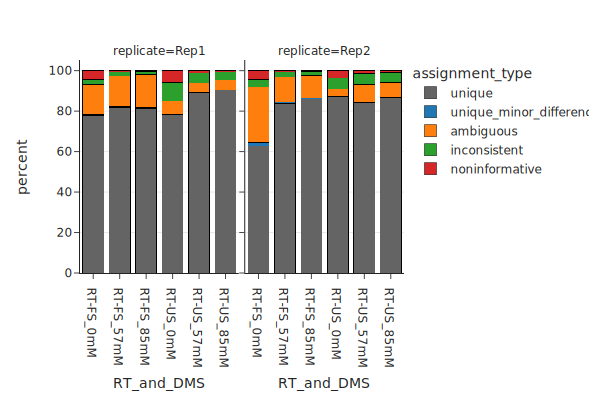

In [107]:
fig = px.bar(assignment_counts, x="RT_and_DMS", y="percent", facet_col="replicate", color="assignment_type", barmode="stack", category_orders=order)
fig.update_yaxes(dtick=20, showgrid=True)
fig.update_layout(width=600, height=400)
fig.update_traces(width=0.8, marker_line_width=0.5, marker_line_color="black")
fig.write_image(f"{figure_dir}/isoquant_classification_percent.svg")
fig.show(renderer="svg")

# Relative isoform expression for uniquely assigned isoforms

In [108]:
unique_assignment_df = read_assignment_df[read_assignment_df["assignment_type"].isin(["unique", "unique_minor_difference"])]
isoform_count_df = unique_assignment_df.groupby("sample")["isoform_id"].value_counts().reset_index(name="count")
isoform_count_df = split_unique_name(isoform_count_df, unique_name_column = "sample")

In [120]:
# This export is critical for use in the workflow because it is used to identify isoforms that have a minimum amount of reads assigned. 

isoform_count_df.to_pickle(f"{data_folder}/isoquant/read_counts.pickle")

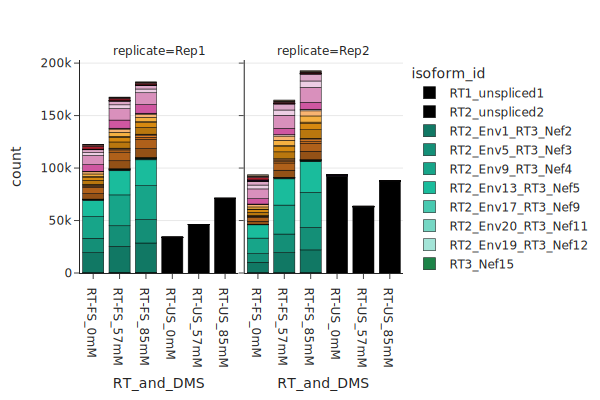

In [117]:
order_dict["isoform_id"] = list(isoform_colors_RT3.keys())
fig = px.bar(isoform_count_df, x="RT_and_DMS",facet_col="replicate",  y="count", color="isoform_id", category_orders=order_dict, color_discrete_map = isoform_colors_RT3)
fig.update_layout(width=600, height=400)
fig.update_traces(width=0.8, marker_line_width=0.5, marker_line_color="black")
fig.write_image(f"{figure_dir}/isoquant_isoform_count.svg")
fig.show()

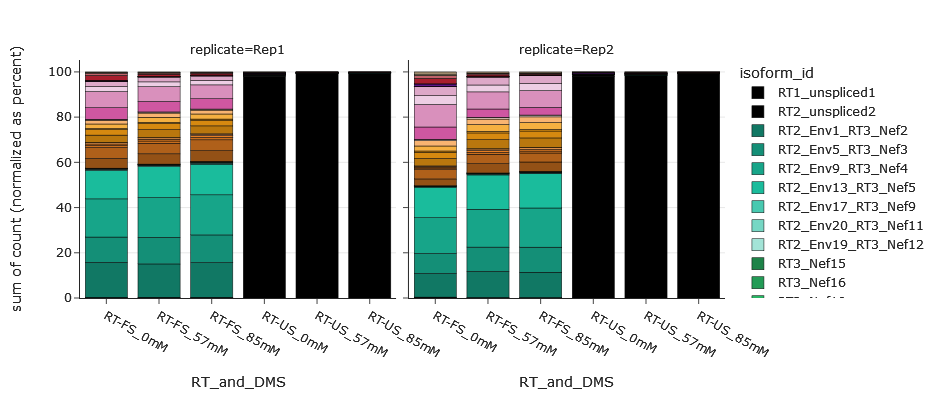

In [118]:
fig = px.histogram(isoform_count_df, x="RT_and_DMS", facet_col="replicate", y="count", color="isoform_id", barnorm="percent", category_orders = order_dict, color_discrete_map = isoform_colors_RT3)
fig.update_layout(width=600, height=400)
fig.update_traces(marker_line_width=0.5, marker_line_color="black")
fig.write_image(f"{figure_dir}/isoquant_isoform_percent.svg")
fig.show(renderer="jupyterlab")

# Isoform expression correlation between replicates

In [119]:
import os
import pandas as pd
import scipy.stats as stats
import numpy as np
os.getcwd()

'/vol/projects/pbohn/AnSo_DMS_MaP/_for_publication/_protocol_example_run'

In [121]:
per_sample_counts = isoform_count_df.groupby("sample").agg({"count":"sum"}).to_dict()["count"]

isoform_count_df["percent"] = 100* isoform_count_df.apply(lambda x: x["count"] / per_sample_counts[x["sample"]], axis=1)

pivot_df = pd.pivot(isoform_count_df, index = ["RT_and_DMS", "isoform_id"], columns = "replicate", values = "percent").reset_index()

{'Nanopore_HIV1_Rep1_RT-FS_0mM_cell': 122604,
 'Nanopore_HIV1_Rep1_RT-FS_57mM_cell': 167638,
 'Nanopore_HIV1_Rep1_RT-FS_85mM_cell': 182156,
 'Nanopore_HIV1_Rep1_RT-US_0mM_cell': 34346,
 'Nanopore_HIV1_Rep1_RT-US_57mM_cell': 46426,
 'Nanopore_HIV1_Rep1_RT-US_85mM_cell': 71399,
 'Nanopore_HIV1_Rep2_RT-FS_0mM_cell': 93618,
 'Nanopore_HIV1_Rep2_RT-FS_57mM_cell': 164837,
 'Nanopore_HIV1_Rep2_RT-FS_85mM_cell': 192813,
 'Nanopore_HIV1_Rep2_RT-US_0mM_cell': 93885,
 'Nanopore_HIV1_Rep2_RT-US_57mM_cell': 63779,
 'Nanopore_HIV1_Rep2_RT-US_85mM_cell': 88001}

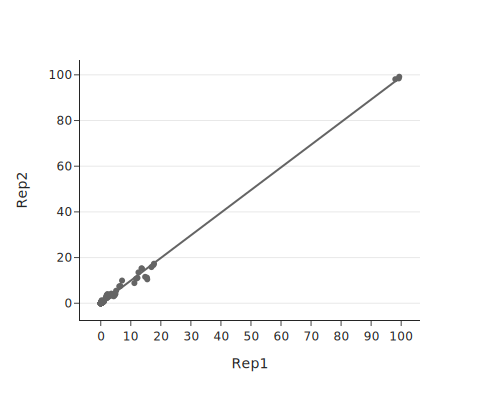

In [126]:
fig = px.scatter(pivot_df, x="Rep1", y="Rep2", trendline="ols")
fig.update_layout(width=500, height=400)
fig.update_xaxes(dtick=10)
fig.show()

In [127]:
results = px.get_trendline_results(fig)

print(results.iloc[0]["px_fit_results"].rsquared)

0.9966137165677839


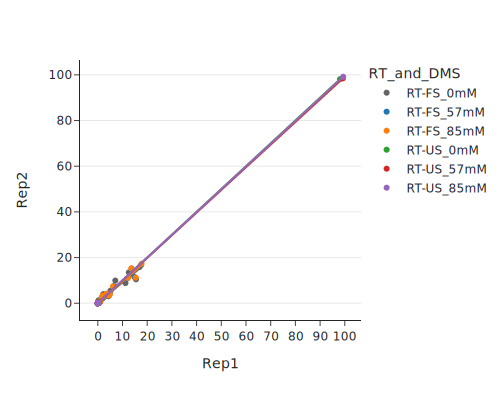

In [128]:
fig = px.scatter(pivot_df, x="Rep1", y="Rep2", color="RT_and_DMS", trendline="ols")
fig.update_layout(width=500, height=400)
fig.update_xaxes(dtick=10)
fig.show()

In [129]:
results = px.get_trendline_results(fig)
for _, row in results.iterrows():
    print(row["RT_and_DMS"])
    print(row["px_fit_results"].rsquared)

RT-FS_0mM
0.933714990672154
RT-FS_57mM
0.9745246537999859
RT-FS_85mM
0.9618634860276496
RT-US_0mM
0.9999903427297899
RT-US_57mM
0.9999876518365786
RT-US_85mM
0.9999981618659899


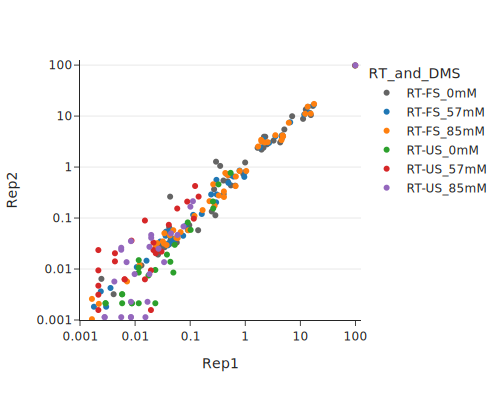

In [130]:
fig = px.scatter(pivot_df, x="Rep1", y="Rep2", color="RT_and_DMS", log_x=True, log_y=True)
fig.update_xaxes(range=[-3, 2.1], dtick=[-2,2])
fig.update_yaxes(range=[-3, 2.1], dtick=[-2,2])

fig.update_layout(width=500, height=400)
fig.show()